# A comparative study of the K-means and Fuzzy C-means clustering algorithms for customer segmentation on retail data

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.graph_objects as go
from fcmeans import FCM
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score
cmap = 'tab10'

In [2]:
# load the dataset

df= pd.read_csv(r'C:\Users\nxk82741\Downloads\marketing_campaign (3).csv', sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# Data cleaning and Feature Engineering

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

* There are 2240 instances in the dataset
* Income is the only attribute in the dataset with null values (2240 - 2216 = 24)
* All attributes are numerical except Education, Marital_status and Dt_Customer. Since the data is from a csv file then these must be text attributes, and are likely categorical

In [5]:
# remove all instances with null value for 'Income'
df_clean = df.dropna(subset=['Income'])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

In [6]:
df_clean.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [7]:
df_clean.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


Dt_Customer is the date of the customer's enrollment with the company. 

In [8]:
df_clean.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


# Feature engineering

In [9]:
# create a new attribute 'Age' from 'Year_Birth'
df_clean['Age'] = 2021 - df_clean['Year_Birth']
df_clean.head()

C:\Users\nxk82741\AppData\Local\Temp/ipykernel_81680/3738995499.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Age'] = 2021 - df_clean['Year_Birth']


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,64
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,67
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,56
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,37
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,40


In [10]:
# create a new attribute 'Total_Spend' from the sum of 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts', 'MntGoldProds
df_clean['Total_Spend'] = df_clean['MntWines'] + df_clean['MntFruits'] + df_clean['MntMeatProducts'] + df_clean['MntFishProducts'] + df_clean['MntSweetProducts'] + df_clean['MntGoldProds']
df_clean.head()

C:\Users\nxk82741\AppData\Local\Temp/ipykernel_81680/116045323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Total_Spend'] = df_clean['MntWines'] + df_clean['MntFruits'] + df_clean['MntMeatProducts'] + df_clean['MntFishProducts'] + df_clean['MntSweetProducts'] + df_clean['MntGoldProds']


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Spend
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,64,1617
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,67,27
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,56,776
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,37,53
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,40,422


In [11]:
# create a new attribute 'Children_Home' from the sum of 'Kidhome' and 'Teenhome' 
df_clean['Children_Home'] = df_clean['Kidhome'] + df_clean['Teenhome']
df_clean.head()

C:\Users\nxk82741\AppData\Local\Temp/ipykernel_81680/3630764810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Children_Home'] = df_clean['Kidhome'] + df_clean['Teenhome']


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Spend,Children_Home
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,3,11,1,64,1617,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,3,11,0,67,27,2
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,3,11,0,56,776,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,3,11,0,37,53,1
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,3,11,0,40,422,1


In [12]:
df_clean['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

It is apparent here that 'Alone', 'Absurd' and 'YOLO' are not standard categories that fall under marital status. 'Alone' could equate to 'Single', 'Divorced' or 'Widow' but is impossible to tell which. However, 'Absurd' and 'YOLO' are not appropriate answers that were perhaps input by someone who wanted to fill the form out quickly or without disclosing accurate personal information. Therefore, it will be assumed that 'Alone', 'Absurd' and 'Yolo' are infact 'Single'.

In [13]:
# Replace 'Alone', 'Absurd' and 'YOLO' with 'Single' in df_clean['Marital_Status']
df_clean['Marital_Status'] = df_clean['Marital_Status'].replace(['Alone', 'Absurd', 'YOLO'], 'Single')
df_clean['Marital_Status'].value_counts()

C:\Users\nxk82741\AppData\Local\Temp/ipykernel_81680/2338459216.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Marital_Status'] = df_clean['Marital_Status'].replace(['Alone', 'Absurd', 'YOLO'], 'Single')


Married     857
Together    573
Single      478
Divorced    232
Widow        76
Name: Marital_Status, dtype: int64

In [14]:
df_clean['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [15]:
# categorize 'Education' into four categories 'Basic', Undergraduate', 'Graduate' and 'Postgraduate'
df_clean['Education'] = df_clean['Education'].replace(['Graduation'], 'Graduate')
df_clean['Education'] = df_clean['Education'].replace(['PhD'], 'Postgraduate')
df_clean['Education'] = df_clean['Education'].replace(['Master'], 'Postgraduate')
df_clean['Education'] = df_clean['Education'].replace(['2n Cycle'], 'Undergraduate')
df_clean['Education'].value_counts()

C:\Users\nxk82741\AppData\Local\Temp/ipykernel_81680/520538656.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Education'] = df_clean['Education'].replace(['Graduation'], 'Graduate')
C:\Users\nxk82741\AppData\Local\Temp/ipykernel_81680/520538656.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Education'] = df_clean['Education'].replace(['PhD'], 'Postgraduate')
C:\Users\nxk82741\AppData\Local\Temp/ipykernel_81680/520538656.py:4: SettingWithCopyWarning: 
A value is trying to be set

Graduate         1116
Postgraduate      846
Undergraduate     200
Basic              54
Name: Education, dtype: int64

In [16]:
df_clean['Z_CostContact'].value_counts()

3    2216
Name: Z_CostContact, dtype: int64

In [17]:
df_clean['Z_Revenue'].value_counts()

11    2216
Name: Z_Revenue, dtype: int64

In [18]:
# create a new attribute of days since first purchase relative to the newest customer 
import datetime
df_clean['Dt_Customer'] = pd.to_datetime(df_clean['Dt_Customer'], dayfirst=True)

dates = []
for i in df_clean['Dt_Customer']:
    i = i.date()
    dates.append(i)

newest_date = max(dates)
print('Newest:', newest_date)
print('Oldest:', min(dates))

Newest: 2014-06-29
Oldest: 2012-07-30


C:\Users\nxk82741\AppData\Local\Temp/ipykernel_81680/2447501751.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Dt_Customer'] = pd.to_datetime(df_clean['Dt_Customer'], dayfirst=True)


In [19]:
days_customer_list = []
for i in dates:
    days_customer_list.append(newest_date - i)
   
df_clean['Days_Customer'] = days_customer_list
df_clean['Days_Customer'] = df_clean['Days_Customer'].dt.days.astype('int64')

df_clean.head()

C:\Users\nxk82741\AppData\Local\Temp/ipykernel_81680/126945690.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Days_Customer'] = days_customer_list
C:\Users\nxk82741\AppData\Local\Temp/ipykernel_81680/126945690.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Days_Customer'] = df_clean['Days_Customer'].dt.days.astype('int64')


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Spend,Children_Home,Days_Customer
0,5524,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,3,11,1,64,1617,0,663
1,2174,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,3,11,0,67,27,2,113
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,56,776,0,312
3,6182,1984,Graduate,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,3,11,0,37,53,1,139
4,5324,1981,Postgraduate,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,40,422,1,161


In [20]:
# drop redundant features
df_clean.drop(['ID', 'Year_Birth', 'Z_CostContact', 'Z_Revenue', 'Dt_Customer'], axis=1, inplace=True)
df_clean.head()

C:\Users\nxk82741\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_Spend,Children_Home,Days_Customer
0,Graduate,Single,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,1,64,1617,0,663
1,Graduate,Single,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,0,67,27,2,113
2,Graduate,Together,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,0,56,776,0,312
3,Graduate,Together,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,0,37,53,1,139
4,Postgraduate,Married,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,0,40,422,1,161


In [21]:
df_clean.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_Spend,Children_Home,Days_Customer
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271,52.179603,607.075361,0.947202,353.521209
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417,11.985554,602.900476,0.749062,202.434667
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,5.000000,0.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,69.000000,0.000000,180.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,51.000000,396.500000,1.000000,355.500000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62.000000,1048.000000,1.000000,529.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,128.000000,2525.000000,3.000000,699.000000


The max age in the dataset is 128, however this is inaccurate as age was calculated using 2021 as this year (as this is when the dataset was published) but the dataset is infact old. However, ages will be correct relative to each other. 128 is clearly incorrect however, so therefore is must be investigated further how many values of age are clearly incorrect. 

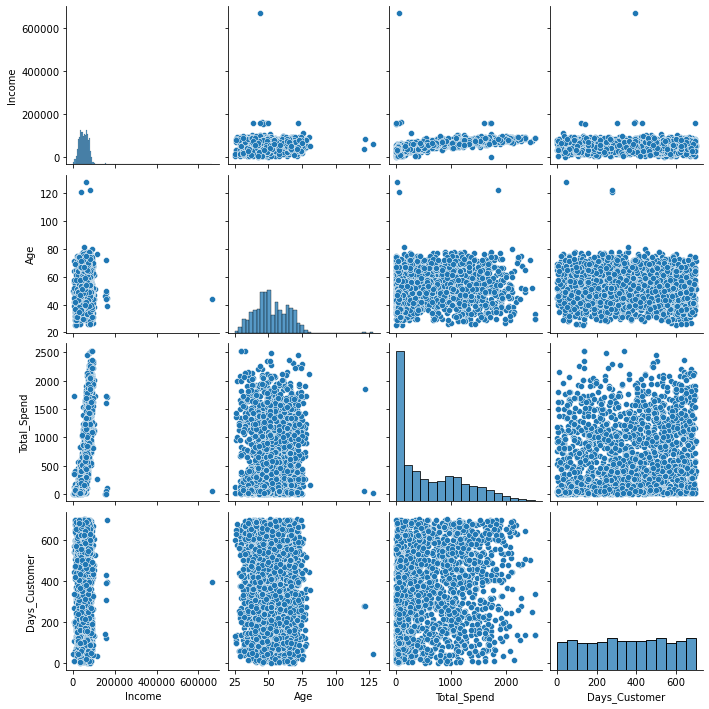

In [22]:
# plot of selected features
selected_features = ['Income', 'Age', 'Total_Spend', 'Days_Customer']
sns.pairplot(df_clean[selected_features])

* There is a clear outlier in income of over 600000, and also some outliers of age around 125 which will all be removed. 
* There is a strong positive correlation between Income and Total_Spend

In [23]:
# removing outliers in Age and Income
df_clean = df_clean[(df_clean['Age'] < 90)]
df_clean = df_clean[(df_clean['Income'] < 600000)]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   object 
 1   Marital_Status       2212 non-null   object 
 2   Income               2212 non-null   float64
 3   Kidhome              2212 non-null   int64  
 4   Teenhome             2212 non-null   int64  
 5   Recency              2212 non-null   int64  
 6   MntWines             2212 non-null   int64  
 7   MntFruits            2212 non-null   int64  
 8   MntMeatProducts      2212 non-null   int64  
 9   MntFishProducts      2212 non-null   int64  
 10  MntSweetProducts     2212 non-null   int64  
 11  MntGoldProds         2212 non-null   int64  
 12  NumDealsPurchases    2212 non-null   int64  
 13  NumWebPurchases      2212 non-null   int64  
 14  NumCatalogPurchases  2212 non-null   int64  
 15  NumStorePurchases    2212 non-null   i

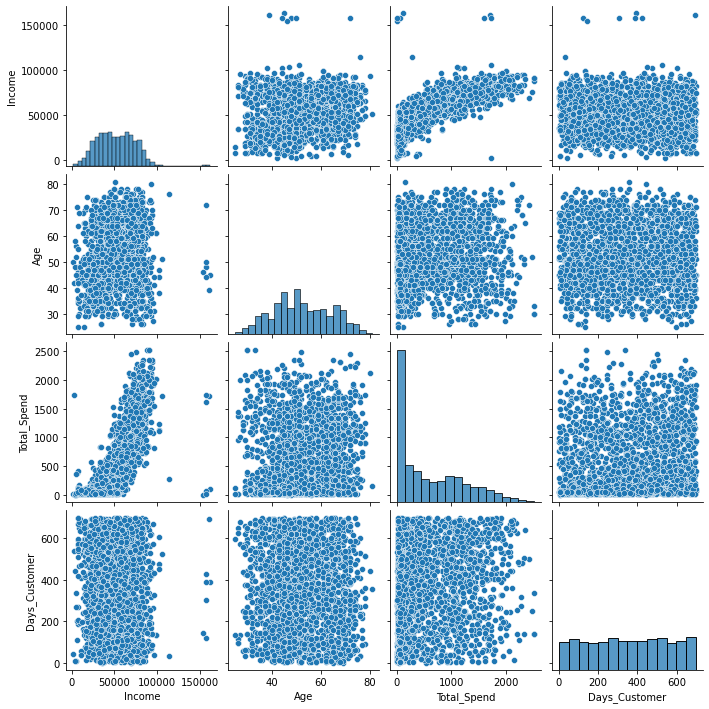

In [24]:
# plot of same selected features excluding outliers
selected_features = ['Income', 'Age', 'Total_Spend', 'Days_Customer']
sns.pairplot(df_clean[selected_features])

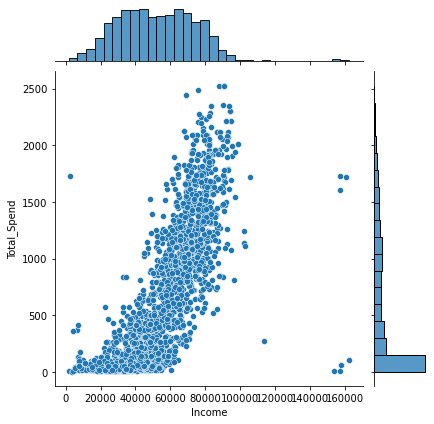

In [25]:
sns.jointplot(data=df_clean, x="Income", y="Total_Spend")

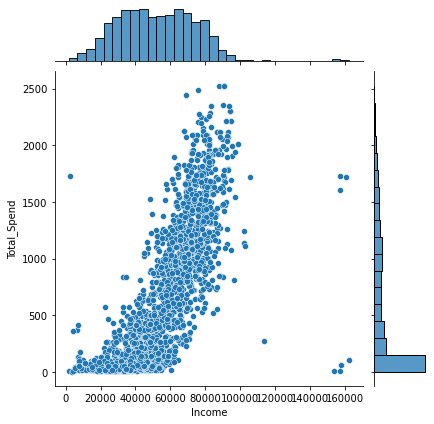

In [26]:
sns.jointplot(data=df_clean, x="Income", y="Total_Spend")

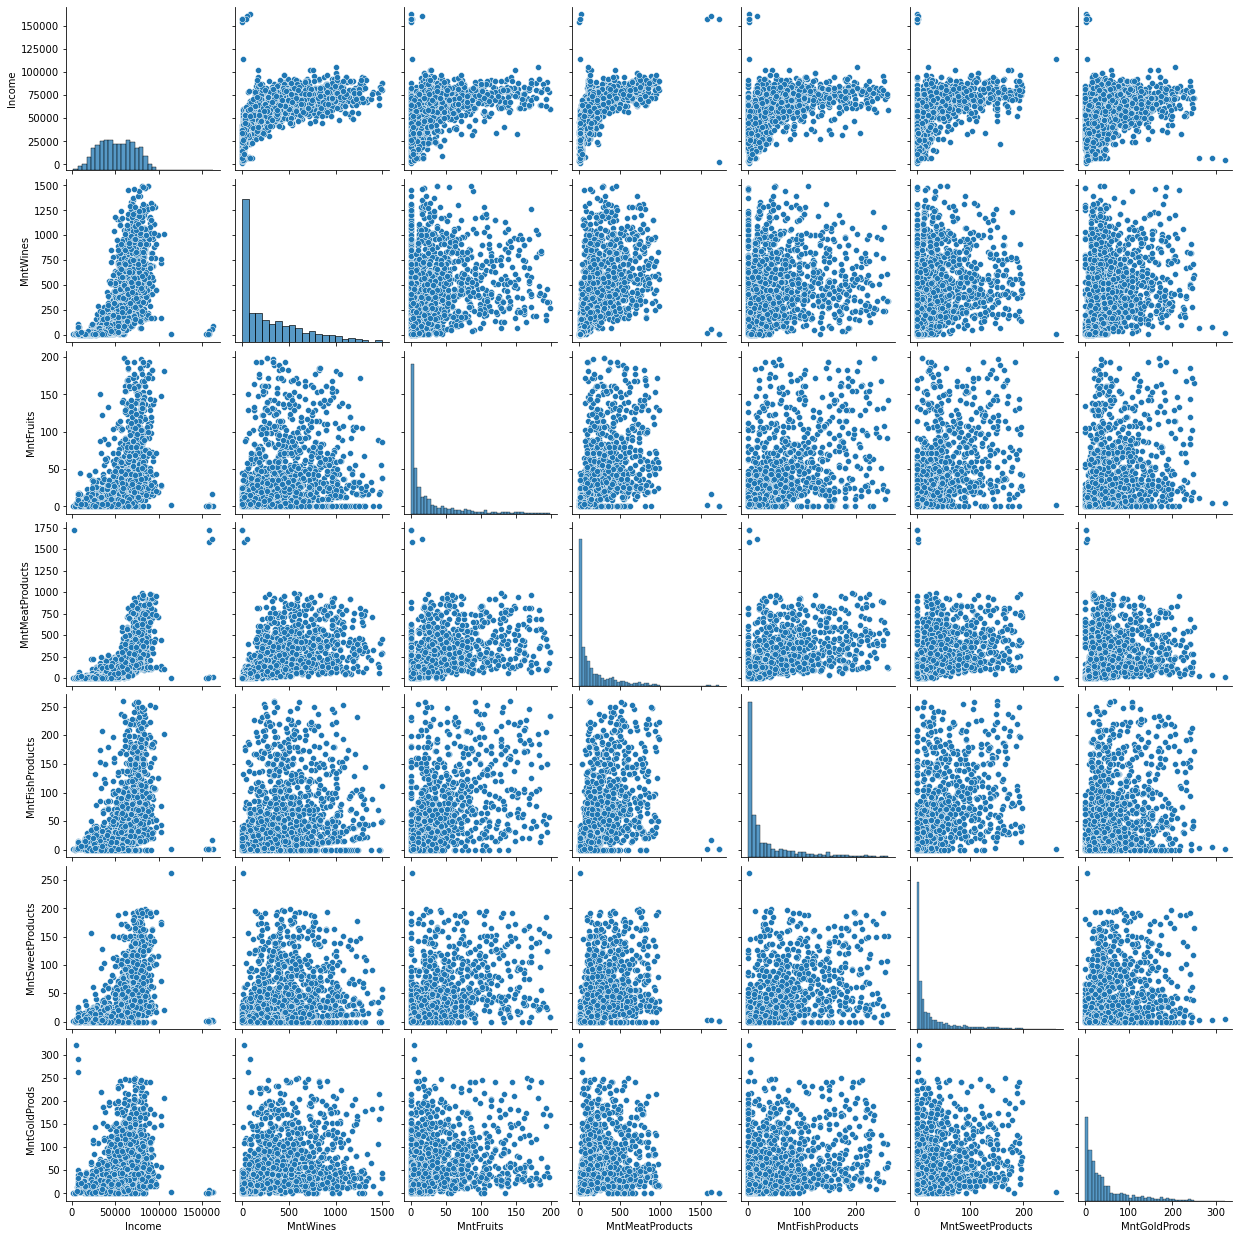

In [27]:
# plot of income and spend in each product category
selected_features = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
sns.pairplot(df_clean[selected_features])

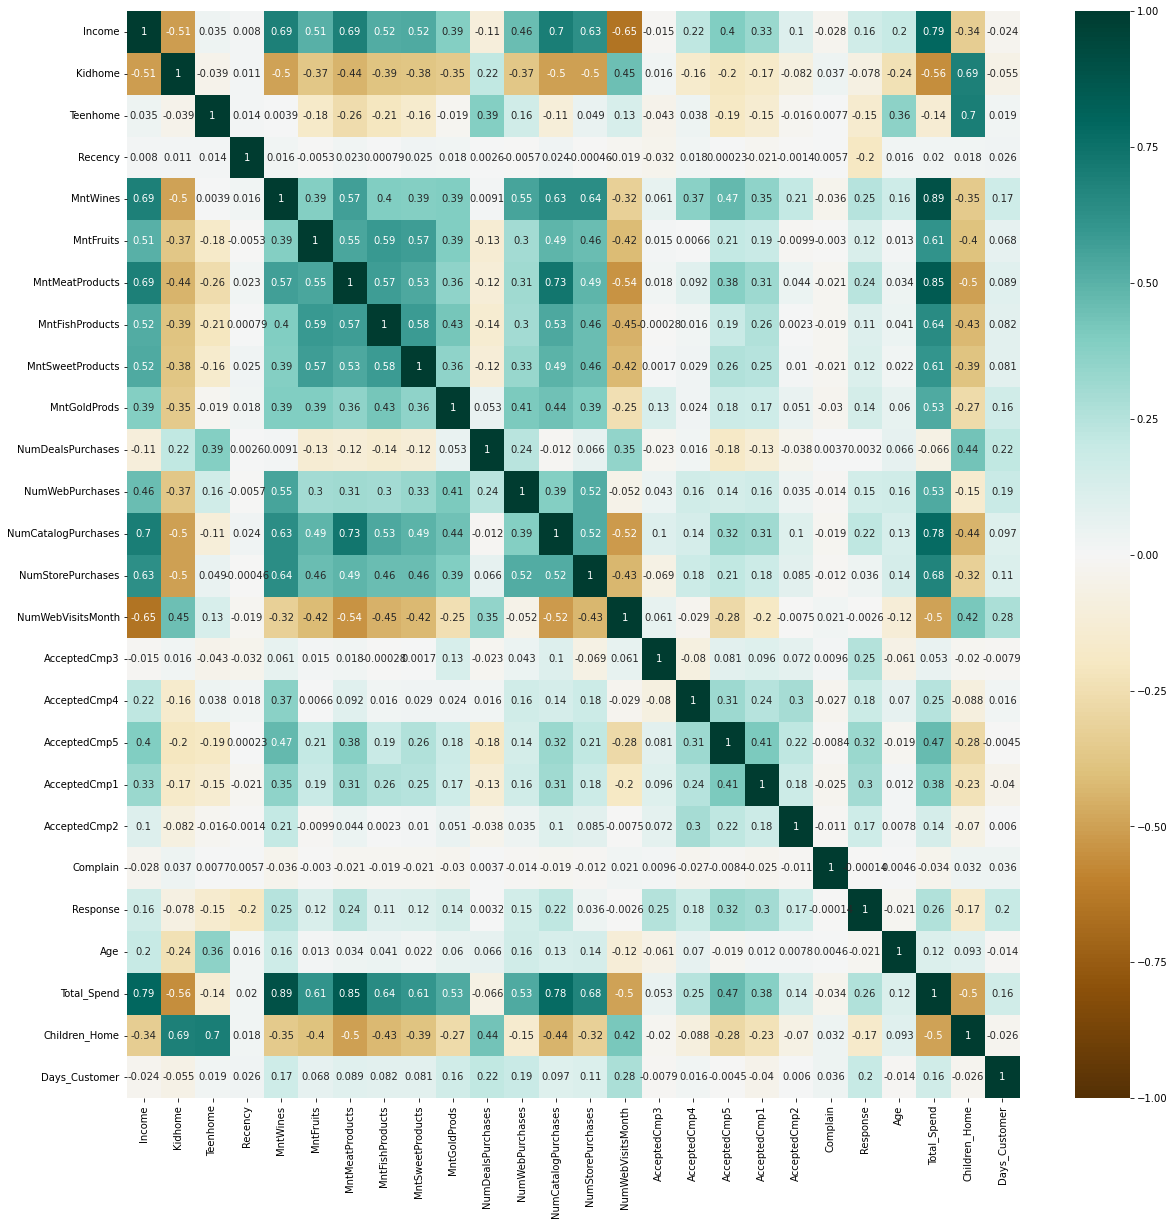

In [28]:
# correlation matrix
plt.figure(figsize=(20,20))
heatmap = sns.heatmap(df_clean.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

# Data preprocessing

## One-Hot Encoding Categorical Variables

In [29]:
df_clean = pd.get_dummies(data=df_clean)
df_clean.head(10)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Days_Customer,Education_Basic,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,58138.0,0,0,58,635,88,546,172,88,88,...,663,0,1,0,0,0,0,1,0,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,113,0,1,0,0,0,0,1,0,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,312,0,1,0,0,0,0,0,1,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,139,0,1,0,0,0,0,0,1,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,161,0,0,1,0,0,1,0,0,0
5,62513.0,0,1,16,520,42,98,0,42,14,...,293,0,0,1,0,0,0,0,1,0
6,55635.0,0,1,34,235,65,164,50,49,27,...,593,0,1,0,0,1,0,0,0,0
7,33454.0,1,0,32,76,10,56,3,1,23,...,417,0,0,1,0,0,1,0,0,0
8,30351.0,1,0,19,14,0,24,3,3,2,...,388,0,0,1,0,0,0,0,1,0
9,5648.0,1,1,68,28,0,6,1,1,13,...,108,0,0,1,0,0,0,0,1,0


In [30]:
df_clean.shape

(2212, 35)

## Scaling

In [31]:
# create a copy of the dataset
temp = df_clean.copy()
scaler = StandardScaler()
scaler.fit(temp)
df_scaled = pd.DataFrame(scaler.transform(temp), columns = df_clean.columns)
df_scaled.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Days_Customer,Education_Basic,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,...,1.527721,-0.158187,0.991895,-0.786220,-0.313547,-0.341479,-0.795281,1.907175,-0.58988,-0.188628
1,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,...,-1.189011,-0.158187,0.991895,-0.786220,-0.313547,-0.341479,-0.795281,1.907175,-0.58988,-0.188628
2,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,...,-0.206048,-0.158187,0.991895,-0.786220,-0.313547,-0.341479,-0.795281,-0.524336,1.69526,-0.188628
3,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,...,-1.060584,-0.158187,0.991895,-0.786220,-0.313547,-0.341479,-0.795281,-0.524336,1.69526,-0.188628
4,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,...,-0.951915,-0.158187,-1.008171,1.271909,-0.313547,-0.341479,1.257417,-0.524336,-0.58988,-0.188628


# Dimensionality reduction

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
pca.fit(df_scaled)

PCA(n_components=3)

In [33]:
pca.explained_variance_ratio_

array([0.22904928, 0.0721518 , 0.05816686])

In [34]:
df_pca = pd.DataFrame(pca.transform(df_scaled), columns=(['PC1', 'PC2', 'PC3']))
df_pca.describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,2212.0,3.842616e-16,2.832022,-5.548243,-2.541509,-0.799130,2.312112,8.447176
PC2,2212.0,-8.151004e-17,1.589483,-3.815286,-1.267245,-0.127487,1.132598,5.696151
PC3,2212.0,1.033933e-16,1.427155,-3.716618,-0.973870,-0.118874,0.931148,7.843848


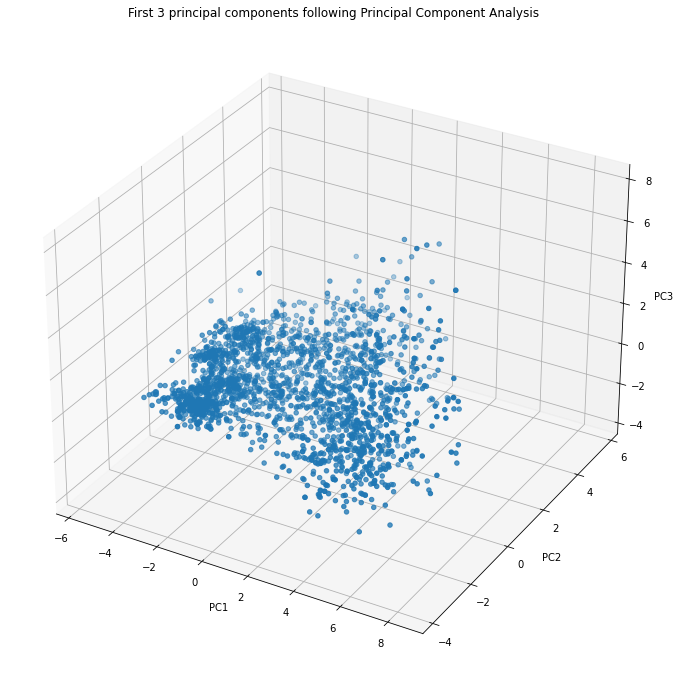

In [35]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

x = df_pca['PC1']
y = df_pca['PC2']
z = df_pca['PC3']

ax.scatter(x, y, z)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('First 3 principal components following Principal Component Analysis')
plt.show()

# Clustering

## K-Means
### Elbow method

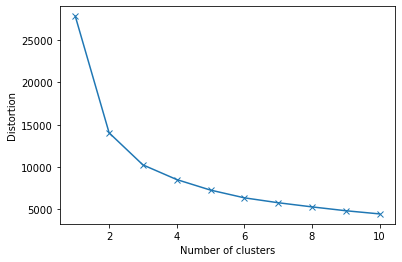

In [36]:
# Elbow method on PCA dataset
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=100, tol=0.001, random_state=15)
    km.fit(df_pca)
    distortions.append(km.inertia_)

plt.plot(range(1, 11), distortions, marker='x')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

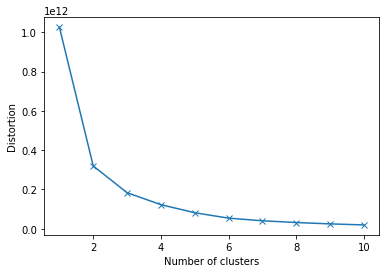

In [37]:
# Elbow method on cleaned dataset
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=100, tol=0.001, random_state=15)
    km.fit(df_clean)
    distortions.append(km.inertia_)

plt.plot(range(1, 11), distortions, marker='x')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

The distorition decreases at a slower rate after 4 clusters. Therefore, we will use 4 clusters (as chosen by visual inspection of the Elbow plot) for the K_Means algorithm.

## Implentation

In [38]:
# K-Means algorithm on full dataset
k_means = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=0.0001, random_state=15)
k_means_result = k_means.fit_predict(df_clean)

In [39]:
df_with_clusters = df_clean.copy()
df_with_clusters['K-Means'] = k_means_result

In [40]:
df_with_clusters['K-Means'].tail(10)

2229    2
2230    2
2231    0
2232    2
2234    2
2235    0
2236    0
2237    0
2238    1
2239    0
Name: K-Means, dtype: int32

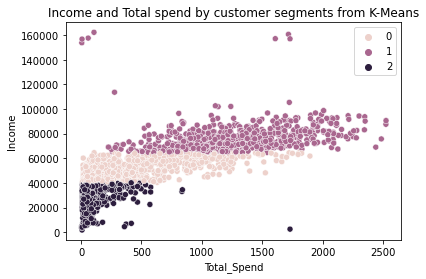

In [41]:
# plot Income and Total_Spend to show their effect on clustering
pl = sns.scatterplot(data = df_with_clusters, x=df_with_clusters["Total_Spend"], y=df_with_clusters["Income"], hue=df_with_clusters["K-Means"], cmap = cmap)
pl.set_title("Income and Total spend by customer segments from K-Means")
plt.legend()
plt.show()

In [42]:
# K-Means silhouette score
k_means_silhouette = silhouette_score(df_clean, k_means_result, metric='euclidean')
print('Silhouette Score: %.3f' % k_means_silhouette)

Silhouette Score: 0.540


In [43]:
# K-Means on PCA dataset
k_means = KMeans(n_clusters=4, init='random', n_init=10, max_iter=300, tol=0.0001, random_state=15)
k_means_result = k_means.fit_predict(df_pca)

In [44]:
# add K-Means clusters to copy of cleaned dataset
df_kmeans = df_clean.copy()
df_kmeans['K-Means'] = k_means_result

In [45]:
# Silhouette score for K-Means on PCA dataset
k_means_silhouette_pca = silhouette_score(df_pca, k_means_result, metric='euclidean')
print('Silhouette Score: %.3f' % k_means_silhouette_pca)

Silhouette Score: 0.357


In [46]:
df_kmeans['K-Means'].tail(20)

2218    1
2219    2
2220    2
2221    3
2222    1
2223    1
2224    2
2225    2
2226    2
2227    2
2229    1
2230    1
2231    2
2232    1
2234    1
2235    0
2236    2
2237    0
2238    2
2239    2
Name: K-Means, dtype: int32

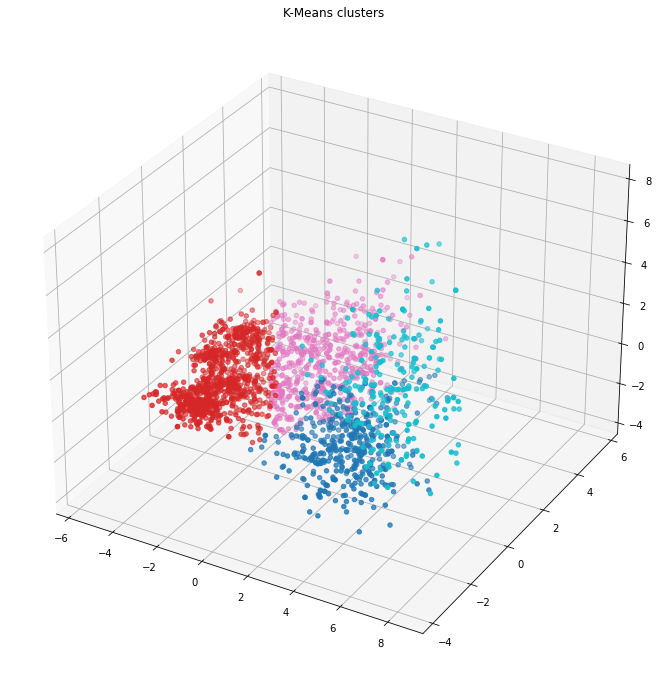

In [47]:
# plot the clusters
fig = plt.figure(figsize=(12,12))
ax = plt.subplot(projection='3d', label='K-Means clusters')
ax.scatter(x, y, z, c=df_kmeans['K-Means'], marker='o', cmap = cmap)
ax.set_title("K-Means clusters")
plt.show()

### Cluster analysis

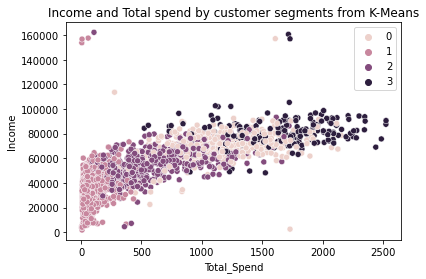

In [48]:
# plot Income and Total_Spend to show their effect on clustering
pl = sns.scatterplot(data = df_kmeans, x=df_kmeans["Total_Spend"], y=df_kmeans["Income"], hue=df_kmeans["K-Means"], cmap = cmap)
pl.set_title("Income and Total spend by customer segments from K-Means")
plt.legend()
plt.show()

It appears that Income and Total_Spend are large factors in determining the customer segments, as they are clearly identifiable in this plot. However, it is not enough to claim that the most valuable customer segment to the business is the cluster with on average the greatest total spent (cluster labelled 3) as the sizes of the other clusters may be much greater.

In [49]:
df_kmeans.head(10)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_Basic,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,K-Means
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,1,0,0,0,0,1,0,0,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,1,0,0,0,0,1,0,0,1
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,1,0,0,0,0,0,1,0,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,1,0,0,0,0,0,1,0,1
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,1,0,0,1,0,0,0,2
5,62513.0,0,1,16,520,42,98,0,42,14,...,0,0,1,0,0,0,0,1,0,2
6,55635.0,0,1,34,235,65,164,50,49,27,...,0,1,0,0,1,0,0,0,0,2
7,33454.0,1,0,32,76,10,56,3,1,23,...,0,0,1,0,0,1,0,0,0,1
8,30351.0,1,0,19,14,0,24,3,3,2,...,0,0,1,0,0,0,0,1,0,1
9,5648.0,1,1,68,28,0,6,1,1,13,...,0,0,1,0,0,0,0,1,0,1


In [50]:
# calculate sum of total spend per cluster (K-Means on full dataset) to determine most valuable segemnt
value1 = 0
value2 = 0
value3 = 0

value1_index = df_with_clusters.index[df_with_clusters['K-Means'] == 0].tolist()
value2_index = df_with_clusters.index[df_with_clusters['K-Means'] == 1].tolist()
value3_index = df_with_clusters.index[df_with_clusters['K-Means'] == 2].tolist()

for i in value1_index:
    value1 += df_with_clusters['Total_Spend'][i]
for i in value2_index:
    value2 += df_with_clusters['Total_Spend'][i]
for i in value3_index:
    value3 += df_with_clusters['Total_Spend'][i]

print("Cluster 1 total spend:", value1)
print("Cluster 2 total spend:", value2)
print("Cluster 3 total spend:", value3)

Cluster 1 total spend: 392703
Cluster 2 total spend: 880062
Cluster 3 total spend: 70512


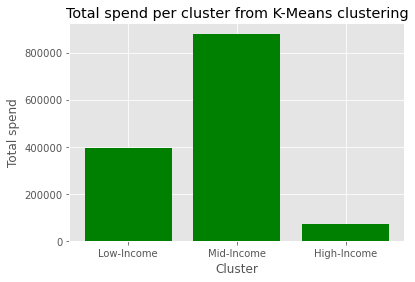

In [51]:
# plot bar chart of total spend per cluster (K-Means on full dataset)
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

cluster_labels = ['Low-Income', 'Mid-Income', 'High-Income']
total_spend_per_cluster = [value1, value2, value3]

x_pos = [i for i, _ in enumerate(cluster_labels)]

plt.bar(x_pos, total_spend_per_cluster, color='green')
plt.xlabel("Cluster")
plt.ylabel("Total spend")
plt.title("Total spend per cluster from K-Means clustering")

plt.xticks(x_pos, cluster_labels)

plt.show()

In [52]:
# calculate sum of total spend per cluster (K-Means on PCA dataset) to determine most valuable segemnt
value1 = 0
value2 = 0
value3 = 0
value4 = 0

value1_index = df_kmeans.index[df_kmeans['K-Means'] == 0].tolist()
value2_index = df_kmeans.index[df_kmeans['K-Means'] == 1].tolist()
value3_index = df_kmeans.index[df_kmeans['K-Means'] == 2].tolist()
value4_index = df_kmeans.index[df_kmeans['K-Means'] == 3].tolist()

for i in value1_index:
    value1 += df_kmeans['Total_Spend'][i]
for i in value2_index:
    value2 += df_kmeans['Total_Spend'][i]
for i in value3_index:
    value3 += df_kmeans['Total_Spend'][i]
for i in value4_index:
    value4 += df_kmeans['Total_Spend'][i]

print("Cluster 1 total spend:", value1)
print("Cluster 2 total spend:", value2)
print("Cluster 3 total spend:", value3)
print("Cluster 4 total spend:", value4)

Cluster 1 total spend: 531379
Cluster 2 total spend: 86236
Cluster 3 total spend: 367229
Cluster 4 total spend: 358433


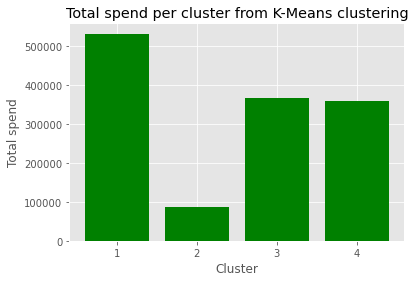

In [53]:
# plot bar chart of total spend per cluster (K-Means on PCA dataset)
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

cluster_labels = ['1', '2', '3', '4']
total_spend_per_cluster = [value1, value2, value3, value4]

x_pos = [i for i, _ in enumerate(cluster_labels)]

plt.bar(x_pos, total_spend_per_cluster, color='green')
plt.xlabel("Cluster")
plt.ylabel("Total spend")
plt.title("Total spend per cluster from K-Means clustering")

plt.xticks(x_pos, cluster_labels)

plt.show()

## Agglomerative clustering

In [54]:
from sklearn.cluster import AgglomerativeClustering

In [55]:
# Agglomerative clustering algorithm on full dataset
AC = AgglomerativeClustering(n_clusters=3)
AC_result = AC.fit_predict(df_clean)
df_with_clusters['AC'] = AC_result
df_with_clusters.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,K-Means,AC
0,58138.0,0,0,58,635,88,546,172,88,88,...,1,0,0,0,0,1,0,0,0,2
1,46344.0,1,1,38,11,1,6,2,1,6,...,1,0,0,0,0,1,0,0,0,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,0,0,1,0,1,2
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,0,0,1,0,2,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,1,0,0,1,0,0,0,0,2


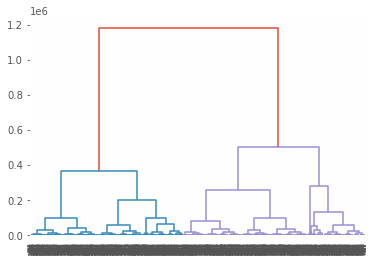

In [56]:
# dendrogram on full dataset
dendrogram = sch.dendrogram(sch.linkage(df_clean, method='ward'))

In [57]:
#Agglomerative silhouette score
ac_silhouette = silhouette_score(df_clean, AC_result, metric='euclidean')
print('Silhouette Score: %.3f' % ac_silhouette)

Silhouette Score: 0.539


In [58]:
# Agglomerative clustering algorithm on PCA dataset
AC = AgglomerativeClustering(n_clusters=4)
AC_result_pca = AC.fit_predict(df_pca)
df_kmeans['AC'] = AC_result
df_kmeans.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,K-Means,AC
0,58138.0,0,0,58,635,88,546,172,88,88,...,1,0,0,0,0,1,0,0,0,2
1,46344.0,1,1,38,11,1,6,2,1,6,...,1,0,0,0,0,1,0,0,1,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,0,0,1,0,0,2
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,0,0,1,0,1,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,1,0,0,1,0,0,0,2,2


In [59]:
# Silhouette score for Agglomerative algorithm on PCA dataset
ac_silhouette_pca = silhouette_score(df_pca, AC_result_pca, metric='euclidean')
print('Silhouette Score: %.3f' % ac_silhouette_pca)

Silhouette Score: 0.348


In [60]:
# dendrogram = sch.dendrogram(sch.linkage(df_pca, method='ward'))

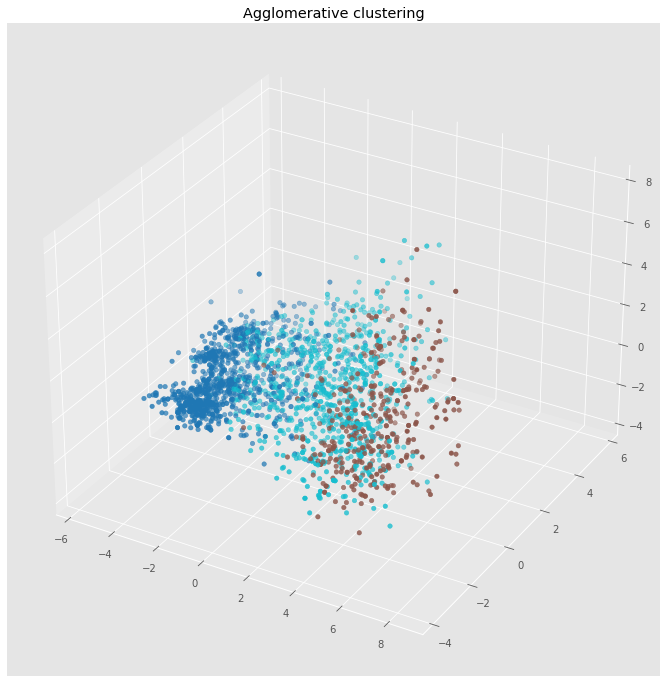

In [61]:
cmap = 'tab10'
fig = plt.figure(figsize=(12,12))
ax = plt.subplot(projection='3d', label='Cluster')
ax.scatter(x, y, z, c=df_kmeans['AC'], marker='o', cmap = cmap)
ax.set_title("Agglomerative clustering")
plt.show()

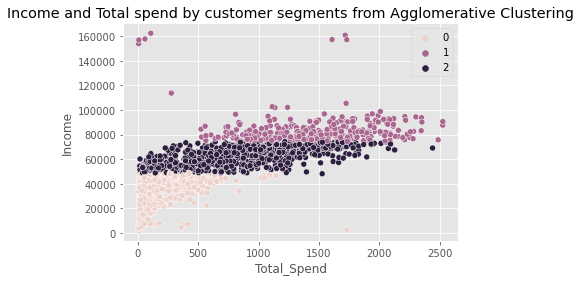

In [62]:
# plot Income and Total_Spend to show their effect on clustering for Agglomerative on full dataset
pl = sns.scatterplot(data = df_with_clusters, x=df_with_clusters["Total_Spend"], y=df_with_clusters["Income"], hue=df_with_clusters["AC"], cmap = cmap)
pl.set_title("Income and Total spend by customer segments from Agglomerative Clustering")
plt.legend()
plt.show()

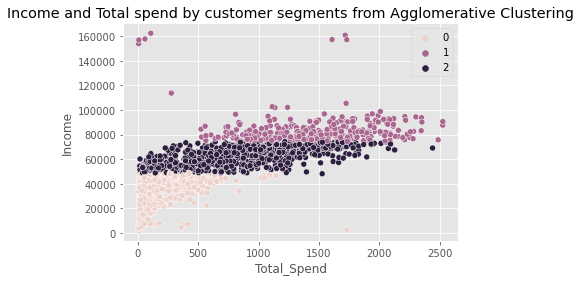

In [63]:
# plot Income and Total_Spend to show their effect on clustering for Agglomerative on PCA dataset
pl = sns.scatterplot(data = df_kmeans, x=df_kmeans["Total_Spend"], y=df_kmeans["Income"], hue=df_kmeans["AC"], cmap = cmap)
pl.set_title("Income and Total spend by customer segments from Agglomerative Clustering")
plt.legend()
plt.show()

In [64]:
# calculate sum of total spend per cluster (Agglomerative) to determine most valuable segemnt
value1_ac = 0
value2_ac = 0
value3_ac = 0

value1_index = df_with_clusters.index[df_with_clusters['AC'] == 1].tolist()
value2_index = df_with_clusters.index[df_with_clusters['AC'] == 2].tolist()
value3_index = df_with_clusters.index[df_with_clusters['AC'] == 0].tolist()

for i in value1_index:
    value1_ac += df_with_clusters['Total_Spend'][i]
for i in value2_index:
    value2_ac += df_with_clusters['Total_Spend'][i]
for i in value3_index:
    value3_ac += df_with_clusters['Total_Spend'][i]

print("Cluster 1 total spend:", value1_ac)
print("Cluster 2 total spend:", value2_ac)
print("Cluster 3 total spend:", value3_ac)

Cluster 1 total spend: 527154
Cluster 2 total spend: 680382
Cluster 3 total spend: 135741


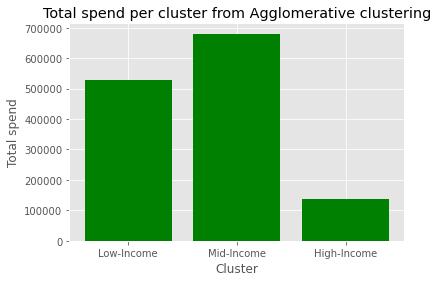

In [65]:
# plot bar chart of total spend per cluster
plt.style.use('ggplot')

cluster_labels = ['Low-Income', 'Mid-Income', 'High-Income']
total_spend_per_cluster = [value1_ac, value2_ac, value3_ac]

x_pos = [i for i, _ in enumerate(cluster_labels)]

plt.bar(x_pos, total_spend_per_cluster, color='green')
plt.xlabel("Cluster")
plt.ylabel("Total spend")
plt.title("Total spend per cluster from Agglomerative clustering")

plt.xticks(x_pos, cluster_labels)

plt.show()

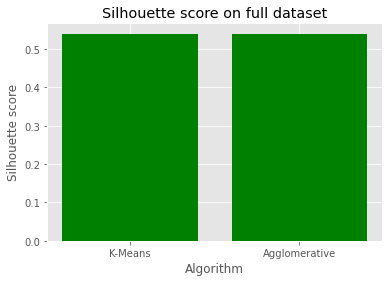

In [66]:
# plot bar chart of Silhouette score for K-Means and Agglomerative algorithms on full dataset
plt.style.use('ggplot')

algorithm_labels = ['K-Means', 'Agglomerative']
silhouette_scores = [k_means_silhouette, ac_silhouette]

plt.bar(algorithm_labels, silhouette_scores, color='green')
plt.xlabel("Algorithm")
plt.ylabel("Silhouette score")
plt.title("Silhouette score on full dataset")


plt.show()

In [75]:
print("K-Means Silhouette score:", k_means_silhouette)
print("Agglomerative Silhouette score:", ac_silhouette)

K-Means Silhouette score: 0.5399910978930981
Agglomerative Silhouette score: 0.5386937752898482


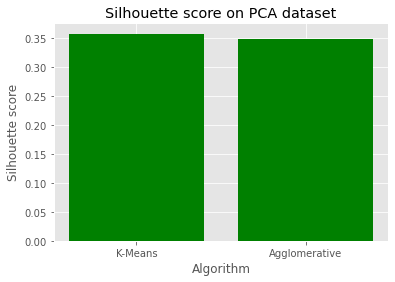

In [74]:
# plot bar chart of Silhouette score for K-Means and Agglomerative algorithms on PCA dataset
plt.style.use('ggplot')

algorithm_labels = ['K-Means', 'Agglomerative']
silhouette_scores = [k_means_silhouette_pca, ac_silhouette_pca]

plt.bar(algorithm_labels, silhouette_scores, color='green')
plt.xlabel("Algorithm")
plt.ylabel("Silhouette score")
plt.title("Silhouette score on PCA dataset")


plt.show()

## Fuzzy C-Means
I could not get the Fuzzy C-Means algorithm to work, but have kept it in to show effort. 

In [68]:
df_pca_array = df_pca.to_numpy(copy=True)
print(df_pca_array)

[[ 4.37613127 -0.63157141 -1.21075262]
 [-2.817078   -0.16356592 -0.53574604]
 [ 1.93114681 -0.72560734 -1.30014745]
 ...
 [ 2.01015283 -0.49914311  0.36622684]
 [ 1.69168242  1.60443727  0.14398022]
 [-2.05908539  2.01417863  1.3286331 ]]


In [69]:
fcm = FCM(n_clusters=4)
fcm_result = fcm.fit(df_pca_array)
print(fcm_result)

None


In [70]:
fcm_centers = fcm.centers
fcm_centers

array([[ 1.44221415,  1.17540963, -0.6462688 ],
       [-1.70366669,  1.00424595,  0.24980719],
       [-2.45516363, -1.27107288,  0.08307569],
       [ 4.09350018, -0.91669916,  0.08011878]])

In [71]:
fcm_labels = fcm.predict(df_pca_array)
np.unique(fcm_labels)

array([0, 1, 2, 3], dtype=int64)

In [72]:
# add fuzzy c-means clusters to dataset
df_fcm = df_clean.copy()
df_fcm['C-Means'] = fcm_result

In [73]:
df_fcm.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_Basic,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,C-Means
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,1,0,0,0,0,1,0,0,None
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,1,0,0,0,0,1,0,0,None
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,1,0,0,0,0,0,1,0,None
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,1,0,0,0,0,0,1,0,None
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,1,0,0,1,0,0,0,None
